In [55]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

This code is submitted as part of project 2 for the subject COMP90037 (Security Analytics) at the University of  Melbourne .
     
    -------------------------------------------
    COMP90037 Security Analytics - Project 2 
    Machine learning based Threat detection

    Author : Mohammed Ahsan Kollathodi 
    Student id: 1048942.
    

K-means Clustering Algorithm  : 
---------------------------------------------------------------

The K-means clustering is one of the simple and popular unsupervised machine learning algorithms. The Objective of K-Means is very simple which is to group similar data points together and discover the underlying patterns. To acheive this objective, the K-Means would look for a fixed number (k) of clusters in the dataset. 

A cluster refers to a collection of data points aggregated together because of certain similarities. 

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.

- The defined number of iterations has been achieved.


The Feature selection was done primarily after data cleaning through the method of Variance Treshold(VT).The Variance Threshold (VT) is a simple baseline approach for feature selection. It would remove all of the features whose variance doesn't meet some treshold.

reference : https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1


### Train data 

In [56]:
pd_train = pd.read_csv('train_data_VT_A1.csv', sep=',')

In [57]:
# Initialised a K means classifier with 3 number of clusters.

K_means = KMeans(n_clusters=3, random_state=0)

# Fit the training samples after features

K_means.fit(pd_train.values)

KMeans(n_clusters=3, random_state=0)

### Test data 

In [58]:
pd_test = pd.read_csv('test_data_VT_A1.csv',  sep=',')

pd_test.fillna(0, inplace=True)


In [59]:
# predict using K means for samples in the test data set trained using the samples in the train set.
predict_test = K_means.predict(pd_test)

In [60]:
pd_test['cluster'] = predict_test
pd_test['cluster'].value_counts()

2    348477
Name: cluster, dtype: int64

In [61]:
pd_test.columns

Index(['num_total_packets', 'duration', 'total_bytes', 'src_bytes',
       'packets_in_Sec', 'bytes_total_in_Sec', 'Source_Bytes_Sec', 'protocol',
       'src_ip', 'src_port', 'direction', 'dst_ip', 'dst_port', 'state',
       'cluster'],
      dtype='object')

In [66]:
#sns.pairplot(pd_test, hue='cluster')

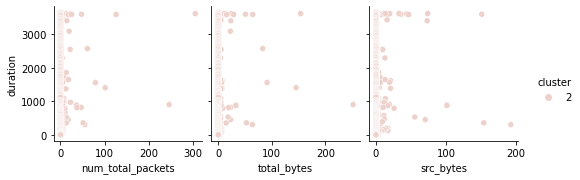

In [65]:
sns.pairplot(
    pd_test, hue = 'cluster',
    y_vars=["duration"],
    x_vars=["num_total_packets", "total_bytes", "src_bytes"],
)

In [ ]:
pd_test.shape

In [67]:
test_original = pd.read_csv('testdata_cleaned.csv', sep=',')

In [68]:
test_original.shape

(348477, 17)

In [69]:
test_original['cluster'] = predict_test

In [70]:
test_original.head()

,timestamp,duration,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,cluster
0,2021-08-15 18:01:29.175156,2752.193853,udp,74.225.127.74,60623,<->,150.35.87.62,63550,CON,0.0,0.0,3,431,288,0.001090,0.156602,0.104644,2
1,2021-08-15 18:01:42.659892,1846.957653,udp,81.237.57.248,51413,<->,150.35.87.62,63549,CON,0.0,0.0,2,421,270,0.001083,0.227942,0.146186,2
2,2021-08-15 18:01:44.669650,2079.032483,udp,34.150.123.142,63197,<->,150.35.87.62,63549,CON,0.0,0.0,1,290,145,0.000481,0.139488,0.069744,2
3,2021-08-15 18:15:52.811230,1533.286882,udp,121.8.38.67,39112,<->,150.35.87.62,63552,CON,0.0,0.0,2,289,145,0.001304,0.188484,0.094568,2
4,2021-08-15 18:24:13.357670,71.863629,udp,85.42.5.252,41912,<->,150.35.87.62,43085,CON,0.0,0.0,23753,24213065,507942,330.528814,336930.731094,7068.137364,2


In [71]:
original_feat_anomalies = test_original.loc[test_original['cluster'].isin([1,2])]

In [72]:
original_feat_anomalies['cluster'].value_counts() # Cluster corresponding to the number of anomalies in the sample. 

2    348477
Name: cluster, dtype: int64

In [74]:
# number of unique source ip address in the dataset 
original_feat_anomalies['src_ip'].nunique()

207030

In [75]:
import numpy as np
original_feat_anomalies.loc[original_feat_anomalies['packets_in_Sec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,duration,src_port,dst_port,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,cluster
count,330963,330963,330963,330929,291215,330963,330963,330963,313538,330963,330957,330963
mean,542.472,32278.6,22253.9,0.00481674,0.000109884,40.3886,25737.7,9775.63,1199.15,inf,inf,2
std,1067.47,19836.6,2.09493e+06,0.112634,0.0179659,3893.67,2.80977e+06,923503,5290.4,nan,nan,0
min,0,0,0,0,0,0,59,0,0,0.0404022,0,2
25%,0.000732101,14375.5,13360,0,0,1,138,74,0.0209766,9.97618,5.57385,2
50%,0.001299,32238,13362,0,0,2,401,146,697.452,157614,75092.5,2
75%,188.978,50329,13365,0,0,4,928,471,1729.43,318343,109948,2
max,3649.84,65537,5.39024e+08,3,3,1.4842e+06,1.06155e+09,2.638e+08,1.0015e+06,inf,inf,2


In [77]:
# save as CSV .
original_feat_anomalies.to_csv('test_A1_KMean_VT_orig_feat.csv', sep=',')